In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
df.head(5)

,name,general,specify,enrollment,language,rating,level,duration,instructor,instructor_rate,offered by
0,Cyber Threat Intelligence,Information Technology,Security,52299,English,4.7,Beginner,25,IBM Skills Network Team,4.5,IBM
1,Network Security,Information Technology,Security,6909,English,4.7,Beginner,8,(ISC)² Education & Training,4.9,ISC2
2,Security Principles,Information Technology,Security,12400,English,4.7,Beginner,5,(ISC)² Education & Training,4.6,ISC2
3,"Grow Your Business with Goldman Sachs 10,000 W...",Business,Entrepreneurship,50738,English,4.8,Other,4,NaN,4.7,NaN
4,"Fundamentals of Negotiation, with Goldman Sach...",Business,Entrepreneurship,20097,English,4.6,Other,4,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.6,Goldman Sachs


In [3]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
X_train, X_test, y_train, y_test = train_test_split(df.drop('rating', axis=1), df['rating'], test_size=0.2, random_state=42)

batch_size = 128
num_batches = len(X_train) // batch_size

mse_values = []
model = DecisionTreeRegressor()
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size if i < num_batches - 1 else len(X_train)

    X_batch = X_train.iloc[start_idx:end_idx]
    y_batch = y_train.iloc[start_idx:end_idx]
    model.fit(X_batch, y_batch)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)
mse_matrix = [mse_values[i:i+num_batches] for i in range(0, len(mse_values), num_batches)]
mse_values


[0.08756993006993011,
 0.08220279720279722,
 0.08069055944055947,
 0.07861888111888114,
 0.08215909090909095,
 0.08135489510489513,
 0.06515734265734267,
 0.06703671328671329,
 0.11148601398601402,
 0.10738636363636367,
 0.07769230769230771,
 0.07230769230769235,
 0.06649475524475526,
 0.07797202797202801,
 0.09303321678321681,
 0.08631118881118882,
 0.06775349650349652,
 0.06045454545454546,
 0.08166083916083919,
 0.09537587412587414,
 0.10022727272727275,
 0.0746678321678322,
 0.0710402097902098,
 0.08152097902097906,
 0.08238636363636365,
 0.08540209790209793,
 0.09171328671328673,
 0.08243881118881122,
 0.07439685314685315,
 0.05832167832167837,
 0.1261975524475525,
 0.09148601398601403,
 0.08885489510489514,
 0.06212412587412588,
 0.06805944055944059]

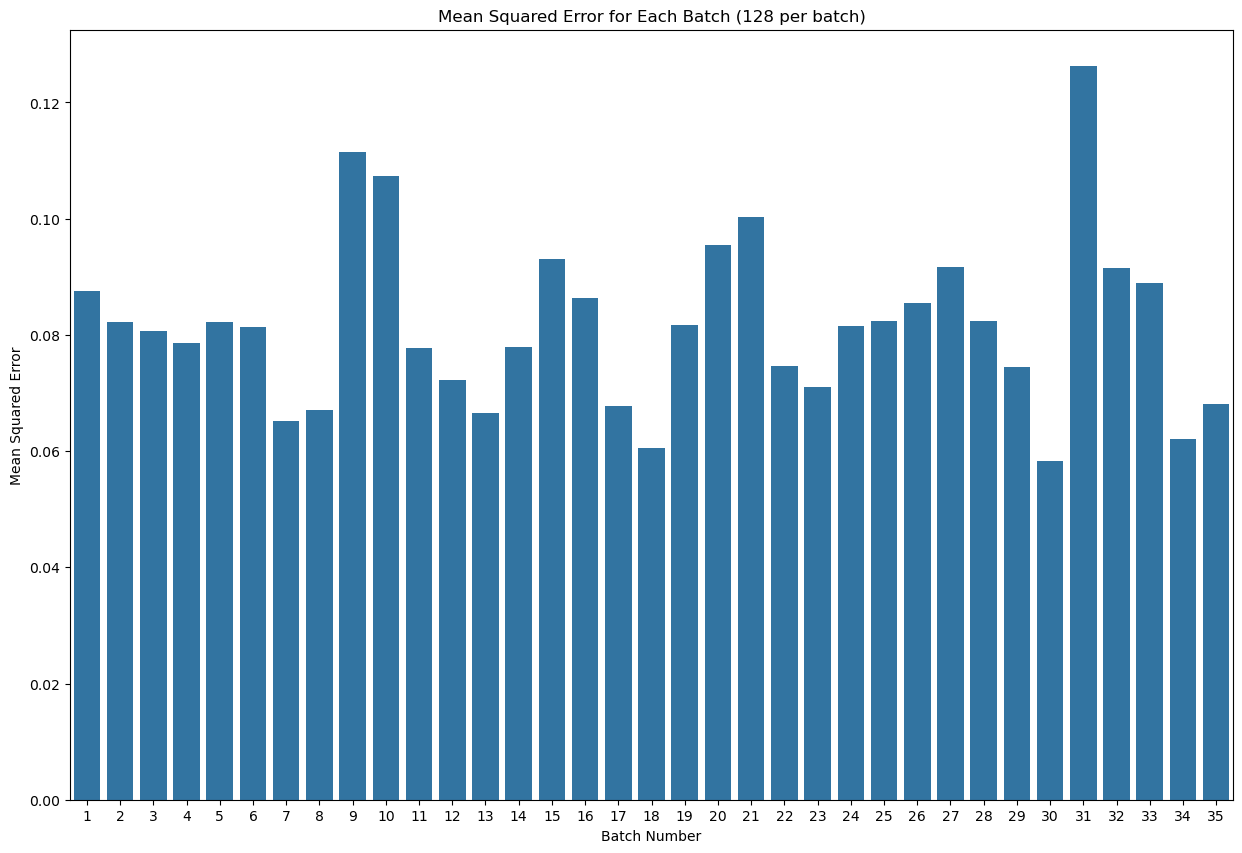

In [6]:
plt.figure(figsize=(15, 10))
sns.barplot(x=range(1, num_batches+1), y=mse_values)
plt.title('Mean Squared Error for Each Batch (128 per batch)')
plt.xlabel('Batch Number')
plt.ylabel('Mean Squared Error')
plt.show()